In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine_load = load_wine()


In [2]:
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)

In [5]:
# wine_load

In [6]:
wine_load.target #다중분류문

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
# ?wine.assign 사용법알아보기

In [10]:
wine2 = wine.assign(Class=lambda x : 1)

In [12]:
wine['Class'] = wine_load.target

In [14]:
# wine.assign({"Class" : wine_load.target})

In [15]:
wine['Class'].map({0:'class_0', 1 : 'class_1', 2 : "class_2"})

0      class_0
1      class_0
2      class_0
3      class_0
4      class_0
        ...   
173    class_2
174    class_2
175    class_2
176    class_2
177    class_2
Name: Class, Length: 178, dtype: object

In [ ]:
#한번 박스플롯그려보기

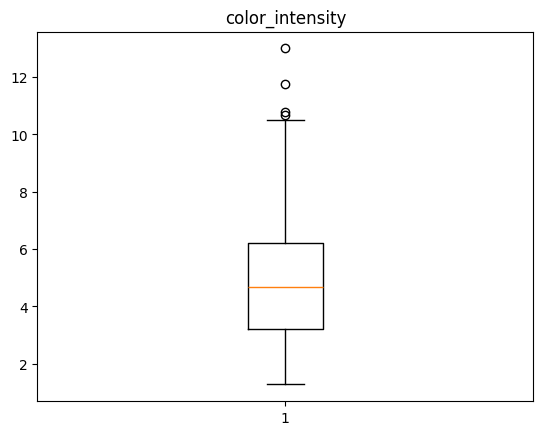

In [18]:
import matplotlib.pyplot as plt

plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()


In [19]:
import numpy as np

def outliers_iqr(dt, col):
    quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
    return outliers[[col]]


In [21]:
8>>1

4

In [22]:
%%timeit
2<<18

7.76 ns ± 0.942 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


In [ ]:
%%timeit
# 2**10000000000000

In [20]:
1 << 2

4

In [23]:
outliers_iqr(wine,"color_intensity") 

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [25]:
wine_outliers = wine.drop(index=outliers_iqr(wine,"color_intensity").index)

In [26]:
wine.shape

(178, 14)

In [27]:
wine_outliers.shape

(174, 14)

In [63]:
wine['color_intensity'].mean()

5.058089882022472

In [65]:
wine.loc[outliers_iqr(wine,"color_intensity").index, "color_intensity"] = np.NaN

In [66]:
wine['color_intensity'].mean() #null값 제외

4.908678155172414

In [67]:
wine["color_intensity"].fillna(wine["color_intensity"].mean())

0       5.64
1       4.38
2       5.68
3       7.80
4       4.32
       ...  
173     7.70
174     7.30
175    10.20
176     9.30
177     9.20
Name: color_intensity, Length: 178, dtype: float64

# 범주형

In [ ]:
# 원핫인코딩
#라벨인코딩

In [57]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [58]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [59]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Class'] = list(map(lambda x : {0 : 'Setosa', 1: 'Versicolour', 2:'Virginica'}[x], iris.target))


iris_df['Class'] = pd.Categorical(iris_df['Class'])


In [60]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   Class              150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [68]:
pd.get_dummies(iris_df,columns=["Class"])
# 한컬럼을 지움으로서 전부다 0이면 그 지운컬럼값을 가졋구나라고 예측가능

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


# 데이터 분할

In [69]:
from sklearn.model_selection import train_test_split

# 8 2 train test
# 7 2 1 train test valid
# cross_validation
# k-fold

# stratify 아 비율 잘섞이게 도와주는거

In [71]:
# ?train_test_split

In [72]:
# 변수개수에 따라 리스트로 패킹한다
tmp =train_test_split(iris_df.drop(columns='Class'), iris_df['Class'], test_size = 0.2)

In [73]:
tmp.__len__()

4

In [79]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns='Class'), iris_df['Class'], test_size = 0.2,
                                                   stratify=iris_df["Class"])

In [80]:
y_train.value_counts(normalize=True)

Class
Setosa         0.333333
Versicolour    0.333333
Virginica      0.333333
Name: proportion, dtype: float64

In [81]:
y_test.value_counts(normalize=True)

Class
Setosa         0.333333
Versicolour    0.333333
Virginica      0.333333
Name: proportion, dtype: float64

# 데이터스케일링

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [85]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
StdScaler = StandardScaler()

# Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)
# StdScaler.fit_transform(X_train)
# Test 데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)
# TRAIN 시킨 스케일러러로 TEST 데이터 트랜스폼



In [86]:
print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))


		(min, max) (mean, std)
Train_scaled (-2.50, 2.73) (0.00, 1.00)
Test_scaled (-2.03, 3.21) (0.03, 1.09)


In [ ]:
# 표준화 방식
# 컬럼들의 평균 0 표편1
# 최솟값,최대값 없다
# 이상치에 민감하다
# 회귀보다 분류에 유용

In [87]:
MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))
     
# 컬럼들의 값이 0과 1사이로 국한된다
# 분류보다 회귀에 유용

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.46, 0.27)
Test_scaled (-0.03, 1.09) (0.47, 0.28)


In [88]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = MaScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))
# - 최대절댓값과 0이 각각 1, 0이 되도록 스케일링
# 모든값이 -1 ~ 1 사이에 표현
# 데ㅣ터가 양수만 있을경우 MIN MAX와 동일
# 이상치에 매우 미감
# 분류보다 회구에 유


		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.63, 0.24)
Test_scaled (0.04, 1.05) (0.63, 0.25)


In [89]:
from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)

# Test 데이터의 스케일링
X_test_sc = RuScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))
# 이상치에 강건하다 민감하다
# 평균과 분산 대신 중앙값과 사분위값 
# 중앙값을 0으로 설정 IQR 이상치 영향을 최소화
# quantile_range 파라미터를 조정ㅎ여 이상치 제어

		(min, max) (mean, std)
Train_scaled (-2.00, 2.40) (-0.02, 0.64)
Test_scaled (-1.60, 2.80) (-0.00, 0.71)


In [90]:
# - 데이터 원복 
display(pd.DataFrame(X_train_sc).head(3))
X_Original = RuScaler.inverse_transform(X_train_sc)
display(pd.DataFrame(X_Original).head(3))


,0,1,2,3
0,-0.230769,-1.4,-0.085714,0.000000
1,0.846154,0.4,0.400000,0.666667
2,0.769231,0.4,0.457143,0.666667


,0,1,2,3
0,5.5,2.3,4.0,1.3
1,6.9,3.2,5.7,2.3
2,6.8,3.2,5.9,2.3


# 차원의저주

In [91]:
# 수치형 데이터만 추출
features = ['수치형변수1', '수치형변수2']
x = iris_df.drop(columns = 'Class')

# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()
 


,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [92]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 4) 
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)


고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


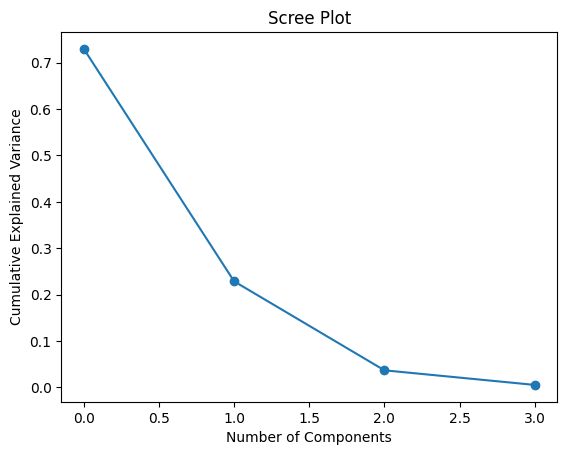

In [93]:
import matplotlib.pyplot as plt

plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()


In [94]:
pca= PCA(n_components=2) #pca 객체분석
principalComponents = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principalComponents,columns=["pc1","pc2"])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


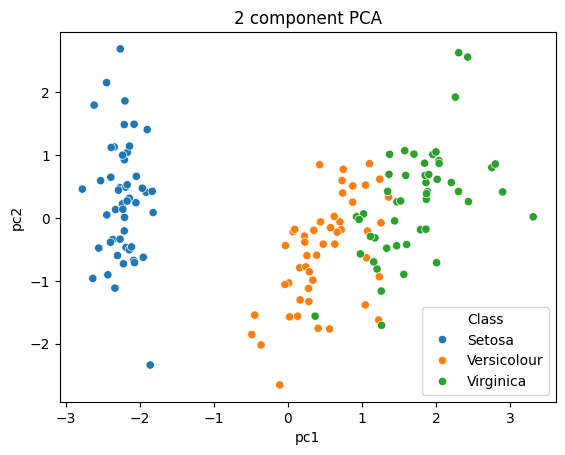

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('2 component PCA' )
sns.scatterplot(x = 'pc1', y = 'pc2', hue = iris_df.Class,  data = principal_iris)
plt.show()


In [ ]:
# 새로운 인공지능 기술 GAN !! GPU가 필요해서 COLAB을 사용

In [ ]:
# iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [54]:
# iris_df["Class"] = list(map(lambda x : {0 : "Setosa" , 1 : "Versicolour", 2 : "Virginica"}[x], iris.target))

In [55]:
# iris_df = pd.Categorical(iris_df["Class"])

In [39]:
# iris_df

In [56]:
# iris_df.info()

In [29]:
# wine.iloc[0]
#원본데이터유지